## <center> Distributions of one variable </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

### Bernoulli distributions

The simplest case of a univariate distribution, and also the basis of the binomial distribution, is the Bernoulli distribution which has only two states, e.g., the simple coin flipping test. If we flip a coin (and the coin is not rigged), the chance that “heads” comes up is $p_{heads} = 0.5 $ 

And since it has to be heads or tails, we must have $p_{heads} + p_{tails} = 1 $

In [2]:
p = 0.5
bernoulliDist = stats.bernoulli(p)

In Python this is called a “frozen distribution function”, and it allows us to calculate everything we want for this distribution. For example, the probability if head comes up zero or one times is given by the *probability mass function (PMF)*

In [3]:
p_tails = bernoulliDist.pmf(0)
p_heads = bernoulliDist.pmf(1)
p_tails, p_heads

(0.5, 0.5)

In [4]:
# Simulate 10 Bernoulli trials with rvs stands for random variates.
bernoulliDist.rvs(10)

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

### Binomial distribution
$$ P[X=x] = \binom nx p^x(1-p)^{n-x}$$

In Python the frozen distribution function takes the parameters $n$ and $p$ as follows:

    stats.binom(n, p)

Ex: Studies show colour blindness affects about 8% of men. A random sample of 10 men is taken. Find the probabilities:

1.0737418240000003e-11
0.4343884542236323
0.18788245514712265
0.9999979752208833


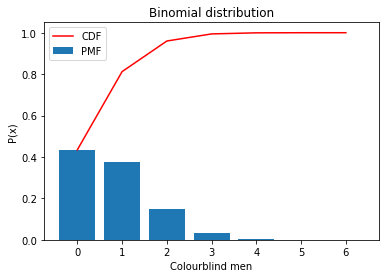

In [5]:
binomDist = stats.binom(10, 8/100)

# a. All 10 men are colourblind
print(binomDist.pmf(10))

# b. No men are colourblind
print(binomDist.pmf(0))

# c. At least 2 men are colourblind
print(1-binomDist.cdf(1))

# d. At the most 6 men are colourblind
print(binomDist.cdf(6))

# Probability distribution plot
x = np.arange(0, 7, 1)

plt.bar(x, binomDist.pmf(x), label="PMF")
plt.plot(x, binomDist.cdf(x), color="red", label="CDF")
plt.xlabel("Colourblind men")
plt.ylabel("P(x)")
plt.title("Binomial distribution")
plt.legend(loc="best");

### Poisson distribution
$$ P[X=x] = \frac{\lambda^xe^{-\lambda}}{x!}$$

In Python the frozen distribution function takes the parameter $\lambda$ as follows:

    stats.poisson(lambda)

Ex: In 2012 there were 62 fatal accidents on streets in Austria. Assuming that those are evenly distributed, we have on average 62/(365/7) = 1.19 fatal accidents per week. Find:

0.3042212640667041
0.2154038660224298
0.006049829391041528


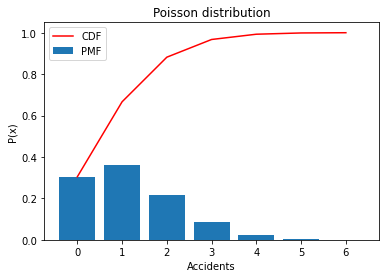

In [6]:
poissonDist = stats.poisson(1.19)

# a. No accidents
print(poissonDist.pmf(0))

# 2 accidents
print(poissonDist.pmf(2))

# 5 accidents
print(poissonDist.pmf(5))


# Probability distribution plot
x = np.arange(0, 7, 1)

plt.bar(x, poissonDist.pmf(x), label="PMF")
plt.plot(x, poissonDist.cdf(x), color="red", label="CDF")
plt.xlabel("Accidents")
plt.ylabel("P(x)")
plt.title("Poisson distribution")
plt.legend(loc="best");

### Normal distribution
The Normal distribution or Gaussian distribution is by far the most important of all the distribution functions. This is due to the fact that the mean values of all distribution functions approximate a normal distribution for large enough sample numbers. Mathematically, the normal distribution is characterized by a mean value $\mu$, and a standard deviation $\sigma$:
$$ f(x) =\frac{1}{\sigma\sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

In Python the frozen distribution function takes the parameters $\mu$ and $\sigma$ as follows:

    stats.norm(mu, sigma)

Ex: Given a random variable with a normal distribution with $\mu = 16.2$ and $\sigma^2 = 1.5625$. Find:

0.3156136965162222
0.14916995033098157
0.66562353704884


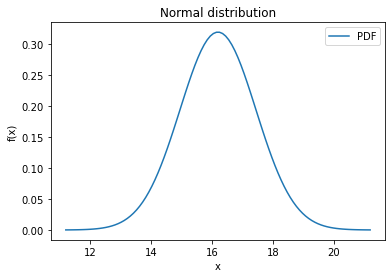

In [7]:
mu = 16.2
sigma = np.sqrt(1.5625)
normDist = stats.norm(mu, sigma)

# Important PDF only evaluates x in the function, it doesn't give a probability
# CDF is used to calculate the area under the curve and give a probability

# a. X more than 16.8
val1 = 1 - normDist.cdf(16.8)
print(val1)

# b. X less than 14.9
val2 = normDist.cdf(14.9)
print(val2)

# c. X between 13.6 and 18.8
val3 = normDist.cdf(16.8) - normDist.cdf(13.6) 
print(val3)


# Probability distribution plot
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)

plt.plot(x, normDist.pdf(x), label="PDF") 
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Normal distribution")
plt.legend(loc="best");

Ex: If cans are assumed to have a standard deviation of 4 g, what does the average weight need to be in order to ensure that 99% of all cans have a weight of at least 250 g?

If you have the area, but you're missing a parameter ($\mu$ or $\sigma$) ... function ppf is used, to then apply the formula:
$$ Z = \frac{x-\mu}{\sigma}$$

In [8]:
prob = 0.99

z_value = stats.norm.ppf(prob)
x = 250
sigma = 4
mean = 250 - z_value*sigma
mean

240.69460850383663